In [1]:
exec(open("objet.py").read(), globals())

<Figure size 1000x600 with 1 Axes>

### Just to visualize

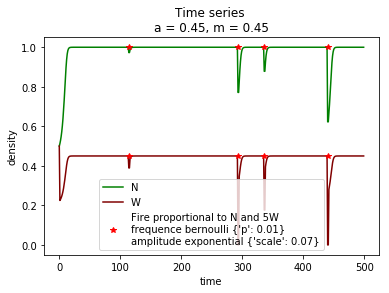

In [2]:
O = Ode(model = "allee_effect_adi", Init=[0.5, 0.5], Param_phy= [0.45, 0.45], finalTime = 500)
O.perturbation()
O.solve_by_part()
O.plot_time_series()

In [3]:
Number_of_simulation = 100

#finalTime = np.linspace(1, 100, 100)
FinalTime = [10**i for i in range(1, 5)]

Variability = np.zeros((len(FinalTime), Number_of_simulation))
Collapse = np.zeros_like(Variability)


for i, finalTime in enumerate(FinalTime):
    for j in range(Number_of_simulation):
        O = Ode(model = "allee_effect_adi", Init=[0.5, 0.5], Param_phy= [0.45, 0.45], finalTime = finalTime)
        O.perturbation()
        Y = O.solve_by_part()
        Variability[i, j] = variability(Y)
#        print(collapse(Y))
        Collapse[i, j] = collapse(Y)    
Var_m = np.mean(Variability, axis= 1)
Col_m = np.mean(Collapse, axis= 1)

## Measures over time

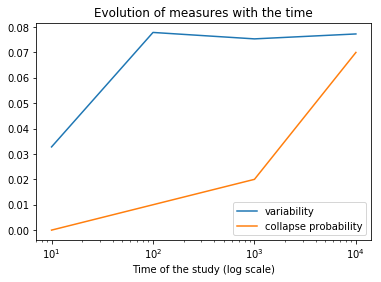

In [4]:
plt.semilogx(FinalTime, Var_m, label="variability")
plt.semilogx(FinalTime, Col_m, label="collapse probability")
plt.legend()
plt.xlabel("Time of the study (log scale)")
plt.title("Evolution of measures with the time")
#plt.savefig("plot/Evolution of measures with the time")
plt.show()

### Measures function to parameter

In [73]:
Param1 = np.linspace(0.3, 0.6, 10)
Param2 = np.linspace(0.2, 2., 30)

Number_of_simulation = 50

Variability = np.zeros((len(Param1), len(Param2), Number_of_simulation))
Collapse = np.zeros_like(Variability)


for i, param1 in enumerate(Param1):
    for j, param2 in enumerate(Param2):
        for k in range(Number_of_simulation):
            O = Ode(model = "allee_effect_adi", solveur = "odeint", Init=[0.5, 0.5], Param_phy= [param1, param2], finalTime = 100)
            O.perturbation()
            Y  = O.solve_by_part()
            Variability[i, j, k] = variability(Y)
    #        print(collapse(Y))
            Collapse[i, j, k] = collapse(Y)    
Var_m = np.mean(Variability, axis= 2)
Col_m = np.mean(Collapse, axis= 2)

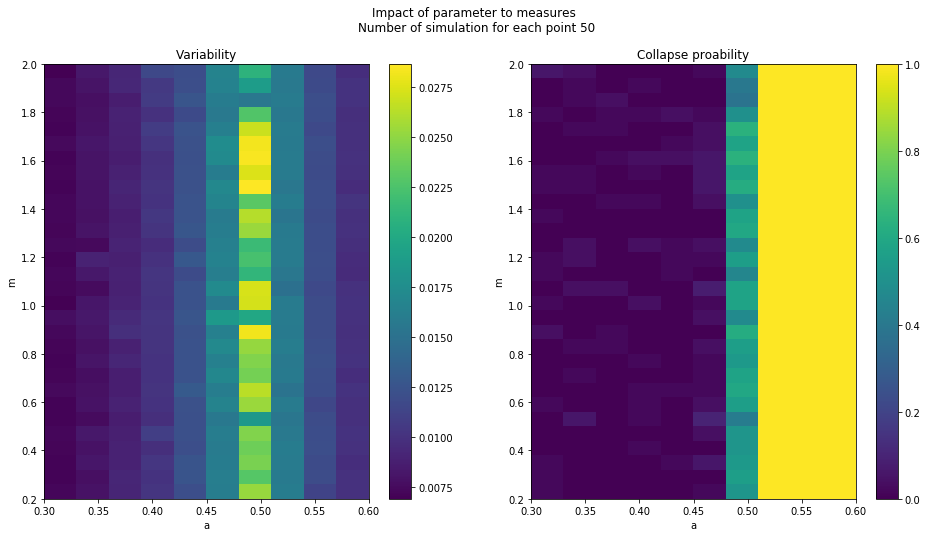

In [74]:
plt.figure(figsize = (16, 8))
#plt.title("Final point for different parameters")
plt.suptitle("Impact of parameter to measures \nNumber of simulation for each point "+str(Number_of_simulation))

mmax = max([np.max(Var_m), np.max(Col_m)])
plt.subplot(1,2,1)
extent = (Param1[0], Param1[-1], Param2[0], Param2[-1])
plt.imshow(Var_m[:,::-1].transpose(), extent = extent, aspect = "auto")
plt.colorbar()
plt.title("Variability")
plt.xlabel("a")
plt.ylabel("m")

plt.subplot(1,2,2)
plt.imshow(Col_m[:,::-1].transpose(), extent = extent, aspect = "auto")
plt.colorbar()
plt.title("Collapse proability")
plt.xlabel("a")
plt.ylabel("m")

#plt.savefig("plot/measures=f(param)")